### Ejercicio Clase 02 - para presentar - éste si!

Vamos a trabajar un dataset con reportes de incidentes del Departamento de Crimenes en la ciudad de San Francisco.

Origen de los datos: https://sfdigitalservices.gitbook.io/dataset-explainers/sfpd-incident-report-2018-to-present

La información viene por mes, en un archivo zip por año.


In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # # para que no salga mensaje de warning
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)

pd.options.display.max_rows = None # ver todas las filas
pd.options.display.max_columns = None # ver todas las columnas

In [10]:
# Trabajamos solo el año actual
file='./Police_Department_Incident_Reports_2024.csv'
df=pd.read_csv(file,sep=',')

In [3]:
df.head(4)

,Unnamed: 0,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2658,08/05/2024 15:09,08/05/2024,15:09,2024,Wednesday,08/05/2024 21:28,1.388850e+11,1388854,240290863,241292953.0,II,Initial,NaN,6301,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, <$50",Open or Active,MASON ST \ PACIFIC AVE,25109000.0,Central,Chinatown,3.0,3.0,37.796291,-122.411720,POINT (-122.4117202758789 37.79629135131836),107.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
1,2659,22/05/2024 22:00,22/05/2024,22:00,2024,Wednesday,23/05/2024 06:26,1.392730e+11,1392730,240322773,241440370.0,VI,Vehicle Initial,NaN,7025,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Truck",Open or Active,20TH ST \ CONNECTICUT ST,23666000.0,Bayview,Potrero Hill,10.0,10.0,37.759968,-122.397247,POINT (-122.39724731445312 37.75996780395508),54.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
2,2660,23/05/2024 05:05,23/05/2024,05:05,2024,Thursday,23/05/2024 05:06,1.392670e+11,1392665,240322739,241440291.0,II,Initial,NaN,5152,Burglary,Burglary - Other,"Burglary, Non-residential, Att. Forcible",Open or Active,18TH ST \ CASTRO ST,25813000.0,Mission,Castro/Upper Market,8.0,8.0,37.760887,-122.434998,POINT (-122.43499755859375 37.760887145996094),38.0,NaN,NaN,NaN,5.0,NaN,5.0,3.0
3,2661,23/05/2024 17:28,23/05/2024,17:28,2024,Thursday,23/05/2024 17:45,1.392890e+11,1392892,240324412,241442697.0,II,Initial,NaN,26120,Other Miscellaneous,Other,"Injuring Phone, Cable TV, or Other Line",Cite or Arrest Adult,BERTITA ST \ SENECA AVE,22048000.0,Ingleside,Outer Mission,11.0,11.0,37.718288,-122.440888,POINT (-122.44088745117188 37.71828842163086),80.0,NaN,NaN,NaN,NaN,NaN,1.0,9.0


#### 1. Realizar el análisis exploratorio del dataset

Obtener los siguientes datos; mostrar las sentencias que se usaron.

<ol type="a">
  <li>Total de filas</li>
  <li>Total de columnas</li>
  <li>Total de columnas con valores nulos. Porcentaje de nulos por columna</li>
  <li>Columnas con mas del 40% de datos nulos. Eliminarlas</li>
  <li>Observar los tipos de datos. Algunos esperabas que fueran de otro tipo?</li>    
</ol>

##### 1.1 Total de filas

In [4]:
print(df.shape)
print(df.columns)

(65618, 36)
Index(['Unnamed: 0', 'Incident Datetime', 'Incident Date', 'Incident Time',
       'Incident Year', 'Incident Day of Week', 'Report Datetime', 'Row ID',
       'Incident ID', 'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012', 'Latitude', 'Longitude', 'Point',
       'Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts'],
      dtype='object')


In [11]:
# porcentaje de nulos por columna
nulos_porcentaje = (df.isnull().sum() / len(df)) * 100
nulos_porcentaje_df = nulos_porcentaje.reset_index()
nulos_porcentaje_df.columns = ['Columna', 'Porcentaje de Nulos']
# print(nulos_porcentaje_df)

# Elimino columnas con mas del 40% de datos nulos

columnas_eliminar = nulos_porcentaje_df[nulos_porcentaje_df['Porcentaje de Nulos'] > 40]['Columna']
df.drop(columnas_eliminar, axis=1, inplace=True)
print(df.shape)

(65618, 30)


In [6]:
# Ver el tipo de dato de cada columna
print(df.dtypes)
# Incident Datetmie, Date Time  deberian ser fechas

Unnamed: 0                        int64
Incident Datetime                object
Incident Date                    object
Incident Time                    object
Incident Year                     int64
Incident Day of Week             object
Report Datetime                  object
Row ID                          float64
Incident ID                       int64
Incident Number                   int64
CAD Number                      float64
Report Type Code                 object
Report Type Description          object
Incident Code                     int64
Incident Category                object
Incident Subcategory             object
Incident Description             object
Resolution                       object
Intersection                     object
CNN                             float64
Police District                  object
Analysis Neighborhood            object
Supervisor District             float64
Supervisor District 2012        float64
Latitude                        float64


In [12]:
# pasar las columnas a fechas y numeros
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'],format = '%d/%m/%Y %H:%M', errors='coerce')
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')
df['Report Datetime'] = pd.to_datetime(df['Report Datetime'], errors='coerce')


# Extraer año, mes y día
df['Incident Year'] = df['Incident Datetime'].dt.year
df['Incident Month'] = df['Incident Datetime'].dt.month
df['Incident Day'] = df['Incident Datetime'].dt.day

# Mostrar las primeras filas para verificar
df.head()


C:\Users\grimo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/05/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\grimo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/05/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\grimo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/05/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\grimo\AppData\Local\Programs\Python\Python39\lib\site-packages\p

,Unnamed: 0,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,Neighborhoods,Current Supervisor Districts,Current Police Districts,Incident Month,Incident Day
0,2658,2024-05-08 15:09:00,2024-08-05,15:09,2024,Wednesday,2024-08-05 21:28:00,1.388850e+11,1388854,240290863,241292953.0,II,Initial,6301,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, <$50",Open or Active,MASON ST \ PACIFIC AVE,25109000.0,Central,Chinatown,3.0,3.0,37.796291,-122.411720,POINT (-122.4117202758789 37.79629135131836),107.0,3.0,6.0,5,8
1,2659,2024-05-22 22:00:00,2024-05-22,22:00,2024,Wednesday,2024-05-23 06:26:00,1.392730e+11,1392730,240322773,241440370.0,VI,Vehicle Initial,7025,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Truck",Open or Active,20TH ST \ CONNECTICUT ST,23666000.0,Bayview,Potrero Hill,10.0,10.0,37.759968,-122.397247,POINT (-122.39724731445312 37.75996780395508),54.0,9.0,2.0,5,22
2,2660,2024-05-23 05:05:00,2024-05-23,05:05,2024,Thursday,2024-05-23 05:06:00,1.392670e+11,1392665,240322739,241440291.0,II,Initial,5152,Burglary,Burglary - Other,"Burglary, Non-residential, Att. Forcible",Open or Active,18TH ST \ CASTRO ST,25813000.0,Mission,Castro/Upper Market,8.0,8.0,37.760887,-122.434998,POINT (-122.43499755859375 37.760887145996094),38.0,5.0,3.0,5,23
3,2661,2024-05-23 17:28:00,2024-05-23,17:28,2024,Thursday,2024-05-23 17:45:00,1.392890e+11,1392892,240324412,241442697.0,II,Initial,26120,Other Miscellaneous,Other,"Injuring Phone, Cable TV, or Other Line",Cite or Arrest Adult,BERTITA ST \ SENECA AVE,22048000.0,Ingleside,Outer Mission,11.0,11.0,37.718288,-122.440888,POINT (-122.44088745117188 37.71828842163086),80.0,1.0,9.0,5,23
4,2662,2024-05-23 14:00:00,2024-05-23,14:00,2024,Thursday,2024-05-23 14:05:00,1.392840e+11,1392837,240323709,241441914.0,II,Initial,64020,Non-Criminal,Other,Mental Health Detention,Open or Active,JEFFERSON ST \ TAYLOR ST,25594000.0,Central,North Beach,3.0,3.0,37.808212,-122.415802,POINT (-122.41580200195312 37.80821228027344),99.0,3.0,6.0,5,23


#### 2. Realizar la estadística descriptiva del dataset

Obtener los siguientes datos; mostrar las sentencias que se usaron.

En este punto, tenemos que saber como funciona el negocio. Ir al origen de los datos nos ayuda (al final describe las columnas).
Ver el mapa de la ciudad. etc

<ol type="a">
  <li>Obtener info estadística de las variables (describe) </li>  
  <li>Total y lista de los valores distintos para las columnas más significativas. Ver cuales pueden ser útiles. Algún diagrama de frecuencia puede servir</li>
</ol>

##### 2.1 Obtener info estadística de las variables (describe)

In [47]:
estadistica_numerica = df.describe()

estadistica_completa = df.describe(include='all')

# estadistica_numerica
estadistica_completa


,Unnamed: 0,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,Neighborhoods,Current Supervisor Districts,Current Police Districts,Incident Month,Incident Day
count,65618.000000,0,65618,65618,0.0,65618,0,6.561800e+04,6.561800e+04,6.561800e+04,5.452300e+04,65618,65618,65618.000000,65516,65516,65618,65618,61926,6.192600e+04,65618,61917,61907.000000,61914.000000,61926.000000,61926.000000,61926,61468.000000,61914.000000,61882.000000,0.0,0.0
unique,NaN,0,224,1440,NaN,7,0,NaN,NaN,NaN,NaN,4,6,NaN,46,68,581,4,7809,NaN,11,41,NaN,NaN,NaN,NaN,7387,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2024-06-30 00:00:00,00:00,NaN,Wednesday,NaN,NaN,NaN,NaN,NaN,II,Initial,NaN,Larceny Theft,Other,"Theft, From Locked Vehicle, >$950",Open or Active,BOARDMAN PL \ BRYANT ST,NaN,Mission,Tenderloin,NaN,NaN,NaN,NaN,POINT (-122.40363311767578 37.77516174316406),NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,428,1977,NaN,10134,NaN,NaN,NaN,NaN,NaN,50170,42280,NaN,14620,8352,3709,49688,398,NaN,8618,8472,NaN,NaN,NaN,NaN,386,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2024-08-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,135561.749154,NaN,NaN,NaN,NaN,NaN,NaN,1.384009e+11,1.384009e+06,2.407183e+08,2.419440e+08,NaN,NaN,25992.111860,NaN,NaN,NaN,NaN,NaN,2.539659e+07,NaN,NaN,6.109826,6.202232,37.767464,-122.423874,NaN,52.268205,6.768227,4.972351,NaN,NaN
std,35448.514429,NaN,NaN,NaN,NaN,NaN,NaN,1.774832e+09,1.774832e+04,3.841792e+06,2.509384e+07,NaN,NaN,25970.746656,NaN,NaN,NaN,NaN,NaN,4.061198e+06,NaN,NaN,2.805548,2.763341,0.024424,0.025833,NaN,31.789294,3.373024,2.766798,NaN,NaN
min,2658.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.351900e+11,1.351896e+06,2.401070e+07,1.722121e+08,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,NaN,2.001300e+07,NaN,NaN,1.000000,1.000000,37.707989,-122.511940,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,126041.250000,NaN,NaN,NaN,NaN,NaN,NaN,1.368510e+11,1.368507e+06,2.401394e+08,2.405807e+08,NaN,NaN,6244.000000,NaN,NaN,NaN,NaN,NaN,2.391400e+07,NaN,NaN,4.000000,4.000000,37.751846,-122.434029,NaN,21.000000,3.000000,3.000000,NaN,NaN


In [48]:
# Análisis de las columnas significativas

# 1. Report Type Description
print("Análisis de 'Report Type Description':")
print(df['Report Type Description'].value_counts())
print("\n")

# 2. Incident Code
print("Análisis de 'Incident Code':")
print(df['Incident Code'].value_counts())
print("\n")

# 3. Incident Category
print("Análisis de 'Incident Category':")
print(df['Incident Category'].value_counts())
print("\n")

# 4. Incident Subcategory
print("Análisis de 'Incident Subcategory':")
print(df['Incident Subcategory'].value_counts())
print("\n")

# 5. Incident Description
print("Análisis de 'Incident Description' (primeras 5 filas):")
print(df['Incident Description'].head())
print("\n")

# 6. Resolution
print("Análisis de 'Resolution':")
print(df['Resolution'].value_counts())
print("\n")


Análisis de 'Report Type Description':
Initial                42280
Coplogic Initial        7890
Initial Supplement      5676
Vehicle Initial         5481
Vehicle Supplement      3594
Coplogic Supplement      697
Name: Report Type Description, dtype: int64


Análisis de 'Incident Code':
6244     3709
4134     2557
7041     2555
7021     2498
28150    1944
71000    1674
6372     1571
28160    1345
64085    1257
63010    1252
64070    1203
6224     1202
62050    1195
6374     1178
64020    1161
68020    1118
71013    1079
72000    1000
19057     838
74000     770
75000     703
65010     675
27195     639
16710     633
61030     628
4013      625
9320      585
6363      583
27170     568
28100     554
6243      503
7055      483
6361      478
51040     473
4014      457
6364      442
7020      436
3074      416
5071      415
26080     413
5073      401
71012     382
65015     364
7025      362
12030     353
6304      353
6362      338
7045      334
7026      331
7023      324
11012     31

#### 3. Buscar los incidentes con mayor cantidad de tipos de incidentes (Incident Description)

Ver en el origen de los datos como se declaran Multiple Incident Codes.

In [13]:
incident_code_counts = df.groupby('Incident ID')['Incident Code'].nunique()
incident_code_counts_sorted = incident_code_counts.sort_values(ascending=False)
print(incident_code_counts_sorted.head(10)) 

incidentes_mas_codigos = df[df['Incident ID'].isin(incident_code_counts_sorted.index[:10])]
incidentes_mas_codigos

Incident ID
1362025    4
1379339    4
1369138    4
1397280    4
1397720    4
1367361    4
1376633    3
1411742    3
1376636    3
1392818    3
Name: Incident Code, dtype: int64


,Unnamed: 0,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,Neighborhoods,Current Supervisor Districts,Current Police Districts,Incident Month,Incident Day
753,14018,2024-05-23 13:40:00,2024-05-23,13:40,2024,Thursday,2024-05-23 13:40:00,1.392820e+11,1392818,240323674,241441831.0,II,Initial,9340,Fraud,Fraud,"Credit Application, Fraudulent",Cite or Arrest Adult,10TH ST \ FELL ST \ MARKET ST \ POLK ST,30746000.0,Tenderloin,Tenderloin,6.0,6.0,37.776543,-122.417503,POINT (-122.4175033569336 37.77654266357422),21.0,10.0,5.0,5,23
4959,76526,2024-05-23 13:40:00,2024-05-23,13:40,2024,Thursday,2024-05-23 13:40:00,1.392820e+11,1392818,240323674,241441831.0,II,Initial,62050,Warrant,Warrant,"Warrant Arrest, Enroute To Outside Jurisdiction",Cite or Arrest Adult,10TH ST \ FELL ST \ MARKET ST \ POLK ST,30746000.0,Tenderloin,Tenderloin,6.0,6.0,37.776543,-122.417503,POINT (-122.4175033569336 37.77654266357422),21.0,10.0,5.0,5,23
5376,78848,2024-05-23 13:40:00,2024-05-23,13:40,2024,Thursday,2024-05-23 13:40:00,1.392820e+11,1392818,240323674,241441831.0,II,Initial,9029,Fraud,Fraud,False Personation to Receive Money or Property,Cite or Arrest Adult,10TH ST \ FELL ST \ MARKET ST \ POLK ST,30746000.0,Tenderloin,Tenderloin,6.0,6.0,37.776543,-122.417503,POINT (-122.4175033569336 37.77654266357422),21.0,10.0,5.0,5,23
18179,127956,2024-06-08 11:30:00,2024-08-06,11:30,2024,Saturday,2024-09-06 16:38:00,1.397280e+11,1397280,240361765,241611942.0,VI,Vehicle Initial,16710,Drug Offense,Drug Violation,"Narcotics Paraphernalia, Possession of",Cite or Arrest Adult,OAK ST \ STEINER ST,25994000.0,Tenderloin,Haight Ashbury,5.0,5.0,37.773758,-122.432465,POINT (-122.43246459960938 37.77375793457031),26.0,11.0,4.0,6,8
18645,128433,2024-06-08 11:30:00,2024-08-06,11:30,2024,Saturday,2024-09-06 16:38:00,1.397280e+11,1397280,240361765,241611942.0,VI,Vehicle Initial,9027,Fraud,Fraud,False Personation,Cite or Arrest Adult,OAK ST \ STEINER ST,25994000.0,Tenderloin,Haight Ashbury,5.0,5.0,37.773758,-122.432465,POINT (-122.43246459960938 37.77375793457031),26.0,11.0,4.0,6,8
18743,128534,2024-02-05 12:05:00,2024-05-02,12:05,2024,Monday,2024-05-02 12:27:00,1.362030e+11,1362025,240078493,240361558.0,VI,Vehicle Initial,26080,Other Miscellaneous,Other,Conspiracy,Open or Active,MINNA ST \ 10TH ST,24413000.0,Southern,South of Market,6.0,6.0,37.774845,-122.415375,POINT (-122.41537475585938 37.774845123291016),32.0,10.0,1.0,2,5
18801,128594,2024-02-05 12:05:00,2024-05-02,12:05,2024,Monday,2024-05-02 12:27:00,1.362030e+11,1362025,240078493,240361558.0,VI,Vehicle Initial,3083,Robbery,Robbery - Carjacking,Carjacking with a Dangerous Weapon,Open or Active,MINNA ST \ 10TH ST,24413000.0,Southern,South of Market,6.0,6.0,37.774845,-122.415375,POINT (-122.41537475585938 37.774845123291016),32.0,10.0,1.0,2,5
18993,128797,2024-02-05 12:05:00,2024-05-02,12:05,2024,Monday,2024-05-02 12:27:00,1.362030e+11,1362025,240078493,240361558.0,VI,Vehicle Initial,3011,Robbery,Robbery - Street,"Robbery, Street or Public Place, W/ Gun",Open or Active,MINNA ST \ 10TH ST,24413000.0,Southern,South of Market,6.0,6.0,37.774845,-122.415375,POINT (-122.41537475585938 37.774845123291016),32.0,10.0,1.0,2,5
19046,128851,2024-02-05 12:05:00,2024-05-02,12:05,2024,Monday,2024-05-02 12:27:00,1.362030e+11,1362025,240078493,240361558.0,VI,Vehicle Initial,7027,Motor Vehicle Theft?,Motor Vehicle Theft,"Auto, Grand Theft of",Open or Active,MINNA ST \ 10TH ST,24413000.0,Southern,South of Market,6.0,6.0,37.774845,-122.415375,POINT (-122.41537475585938 37.774845123291016),32.0,10.0,1.0,2,5
19217,129026,2024-06-08 11:30:00,2024-08-06,11:30,2024,Saturday,2024-09-06 16:38:00,1.397280e+11,1397280,2

#### 4. Obtener una o más conclusiones a partir del mes o de la hora de los incidentes. 

Combinarlo con otra columna como mínimo.

La mayor cantidad de incidentes ocurrió a las 12:00 horas, con un total de 4090 incidentes.


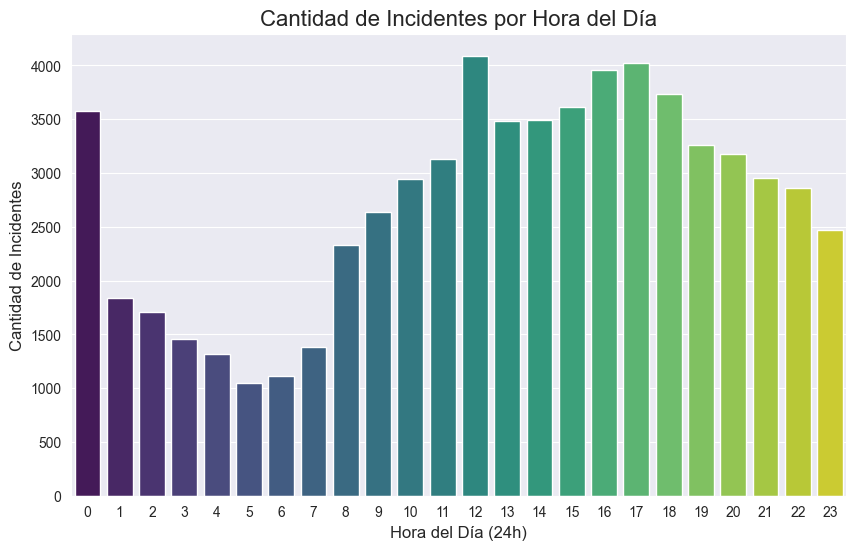

In [14]:
df['Incident Hour'] = df['Incident Datetime'].dt.hour
incidentes_por_hora = df['Incident Hour'].value_counts().sort_index()

hora_mas_incidentes = incidentes_por_hora.idxmax()
cantidad_mas_incidentes = incidentes_por_hora.max()

print(f"La mayor cantidad de incidentes ocurrió a las {hora_mas_incidentes}:00 horas, con un total de {cantidad_mas_incidentes} incidentes.")


# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras con Seaborn
sns.barplot(x=incidentes_por_hora.index, y=incidentes_por_hora.values, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Cantidad de Incidentes por Hora del Día', fontsize=16)
plt.xlabel('Hora del Día (24h)', fontsize=12)
plt.ylabel('Cantidad de Incidentes', fontsize=12)

# Mostrar el gráfico
plt.show()

In [30]:
# Crear la columna 'Incident Time of Day'
def clasificar_tiempo(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

df['Incident Time of Day'] = df['Incident Hour'].apply(clasificar_tiempo)

# Identificar el horario con más incidentes
horario_mas_incidentes = df['Incident Time of Day'].value_counts().idxmax()
print(f"El horario con más incidentes es: {horario_mas_incidentes}")


El horario con más incidentes es: Tarde


In [31]:
import folium
from folium.plugins import MarkerCluster

# Eliminar filas con NaN en las columnas necesarias
df = df.dropna(subset=['Latitude', 'Longitude', 'Incident Time of Day', 'Incident Code'])

# Filtrar el DataFrame para incluir solo los incidentes del horario más común
df_filtrado = df[df['Incident Time of Day'] == horario_mas_incidentes]

# Crear un mapa base centrado en San Francisco
map_sf = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Definir color para el horario con más incidentes
color_horario = {
    'Mañana': 'blue',
    'Tarde': 'green',
    'Noche': 'orange',
    'Madrugada': 'purple'
}[horario_mas_incidentes]

# Añadir puntos al mapa solo para el horario más común
marker_cluster = MarkerCluster().add_to(map_sf)

for _, row in df_filtrado.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=color_horario,
        fill=True,
        fill_color=color_horario,
        fill_opacity=0.6,
        popup=f"Time of Day: {row['Incident Time of Day']}\nIncident Code: {row['Incident Code']}"
    ).add_to(marker_cluster)

# Guardar el mapa en un archivo HTML
map_sf.save("san_francisco_incidents.html")

print("Mapa guardado como 'san_francisco_incidents.html'")

Mapa guardado como 'san_francisco_incidents.html'


#### 5. Investigar las 10 intersecciones de calles donde se realiza la mayor cantidad de alguna categoría de incidentes

In [21]:
# Agrupar los incidentes por 'Incident Category' y contar la cantidad de incidentes en cada categoría
categoria_mas_incidentes = df['Incident Category'].value_counts().idxmax()

print(f"La categoría con mayor cantidad de incidentes es: {categoria_mas_incidentes}")

# Filtrar los incidentes para la categoría con más incidentes
df_categoria_mas_incidentes = df[df['Incident Category'] == categoria_mas_incidentes]

# Contar las intersecciones más comunes en esa categoría
top_intersecciones = df_categoria_mas_incidentes['Intersection'].value_counts().head(10)

print(f"\nLas 10 intersecciones que más aparecen en {categoria_mas_incidentes} son:")
print(top_intersecciones)


La categoría con mayor cantidad de incidentes es: Larceny Theft

Las 10 intersecciones que más aparecen en Larceny Theft son:
ELLIS ST \ WEBSTER ST           272
20TH AVE \ WINSTON DR            95
OFARRELL ST \ POWELL ST          93
POWELL ST \ OFARRELL ST          85
MARKET ST \ POWELL ST            68
24TH ST \ POTRERO AVE            68
MISSION ST \ VIRGINIA AVE        67
GEARY BLVD \ PRESIDIO AVE        65
FRANCISCO ST \ MONTGOMERY ST     60
EDDY ST \ POWELL ST              57
Name: Intersection, dtype: int64


#### 5.1 Mostrar en el mapa las intersecciones de calles encontradas

In [29]:
# Este no lo puede hacer poner bien los puntos porque me tira que el dataset esta vacio

# # Filtrar el DataFrame para incluir solo las intersecciones más comunes y verificar su presencia
# intersecciones_coords = df_categoria_mas_incidentes[df_categoria_mas_incidentes['Intersection'].isin(top_intersecciones)]
# 
# print("\nFiltrado de intersecciones, tamaño de intersecciones_coords:", len(intersecciones_coords))
# 
# # Eliminar filas con NaN en las columnas necesarias
# intersecciones_coords = intersecciones_coords.dropna(subset=['Latitude', 'Longitude'])
# 
# # Seleccionar solo las columnas de interés y eliminar duplicados
# intersecciones_coords = intersecciones_coords[['Intersection', 'Latitude', 'Longitude']].drop_duplicates()
# 
# # Verifica el contenido de intersecciones_coords después del filtrado
# print(intersecciones_coords)
# 
# # Si intersecciones_coords sigue vacío, asegúrate de que las intersecciones existen y están correctamente formateadas
# if intersecciones_coords.empty:
#     print("No se encontraron intersecciones coincidentes. Verifica los datos y asegúrate de que las intersecciones en top_intersecciones existan en df_categoria_mas_incidentes.")
# 
# # Crear un mapa base centrado en San Francisco
# map_sf = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
# 
# # Añadir marcadores para cada una de las 10 intersecciones más comunes
# for _, row in intersecciones_coords.iterrows():
#     folium.Marker(
#         location=[row['Latitude'], row['Longitude']],
#         popup=f"Intersection: {row['Intersection']}",
#         icon=folium.Icon(color='red', icon='info-sign')
#     ).add_to(map_sf)
# 
# # Guardar el mapa en un archivo HTML
# map_sf.save("san_francisco_top_intersections.html")
# 
# print("Mapa guardado como 'san_francisco_top_intersections.html'")



Filtrado de intersecciones, tamaño de intersecciones_coords: 0
Empty DataFrame
Columns: [Intersection, Latitude, Longitude]
Index: []
No se encontraron intersecciones coincidentes. Verifica los datos y asegúrate de que las intersecciones en top_intersecciones existan en df_categoria_mas_incidentes.
Mapa guardado como 'san_francisco_top_intersections.html'
